<a href="https://colab.research.google.com/github/Clonlyfan/Statistics-and-more/blob/main/Dimention_Reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while **preserving as much of the original variance** as possible.

**The PCA process involves these steps**:
*   Standardization
*   Covariance Matrix Computation
*   Eigendecomposition
*   Variance Ranking
Limitations

**Assumes linear relationships**
*   Assumes linear relationships
*   Can lose interpretability of original features
*   Sensitive to outliers

 ***If you were to apply PCA to the entire dataset before splitting, you would inadvertently leak information from the test set into your model. The principal components would be influenced by patterns in the test data, which violates the principle that test data should remain completely unseen during model development.
This same principle applies to other preprocessing steps like standardization or normalization - always fit these transformations on training data only, then apply them to both sets.***



Explained Variance Ratio:
Principal Component 1: 76.29%
Principal Component 2: 22.42%
Principal Component 3: 1.16%
Principal Component 4: 0.14%


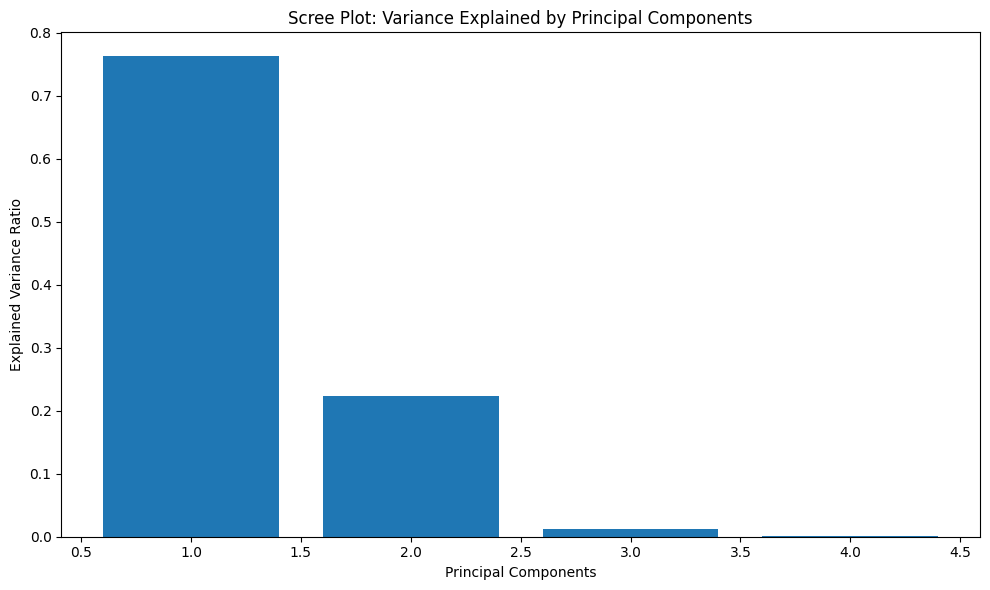


Component Loadings:
                           PC1       PC2       PC3       PC4
Study_Hours           0.569127  0.047592 -0.379761  0.727744
Sleep_Hours          -0.229652  0.967071 -0.080806  0.074187
Lecture_Attendance    0.553155  0.200728  0.808178 -0.023984
Previous_Exam_Scores  0.563360  0.149053 -0.442832 -0.681402


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Example Dataset: Student Performance Metrics
# Features: Study Hours, Sleep Hours, Lecture Attendance, Previous Exam Scores
data = {
    'Study_Hours': [5, 3, 6, 4, 7, 2, 8, 5, 4, 6],
    'Sleep_Hours': [7, 6, 5, 8, 6, 5, 4, 7, 6, 5],
    'Lecture_Attendance': [90, 70, 85, 75, 95, 60, 100, 80, 70, 85],
    'Previous_Exam_Scores': [75, 60, 80, 70, 85, 55, 90, 75, 65, 80]
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_

# Print key PCA results
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {ratio * 100:.2f}%")

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Variance Explained by Principal Components')
plt.tight_layout()
plt.show()

# Loadings (how original features contribute to principal components)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)
print("\nComponent Loadings:")
print(loadings)

t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a powerful dimensionality reduction technique particularly well-suited for visualizing high-dimensional data in 2D or 3D space. **Unlike PCA, which focuses on preserving global structure, t-SNE excels at preserving local similarities between points**.



Data shape: (1797, 64)
Number of classes: 10


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-3-8f1a53468f4f>:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


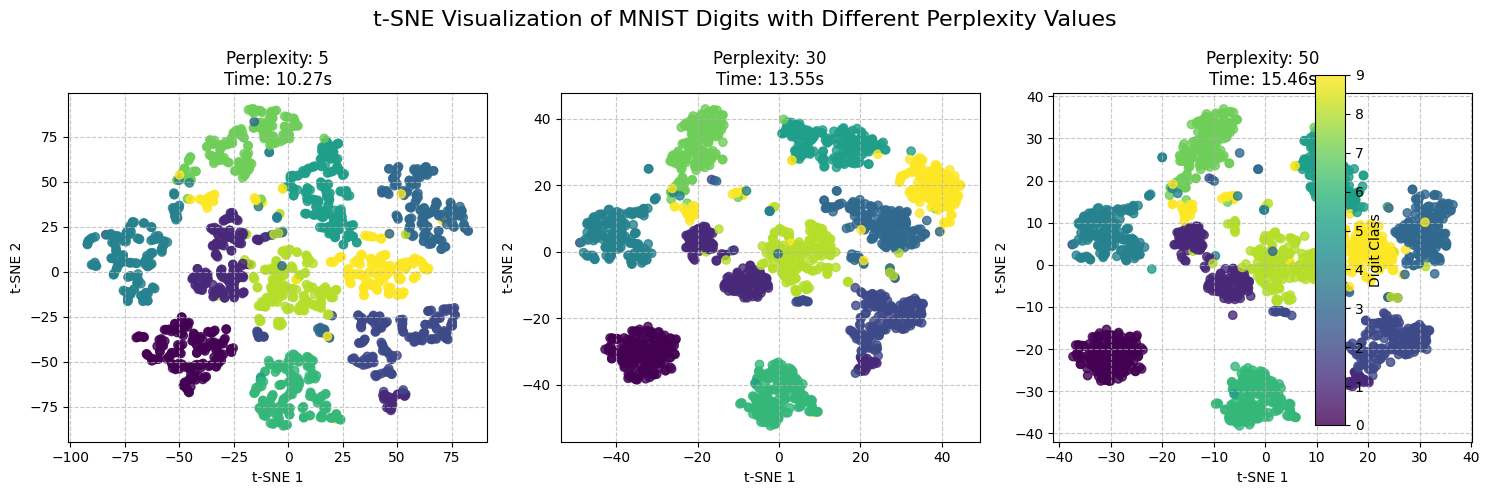

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


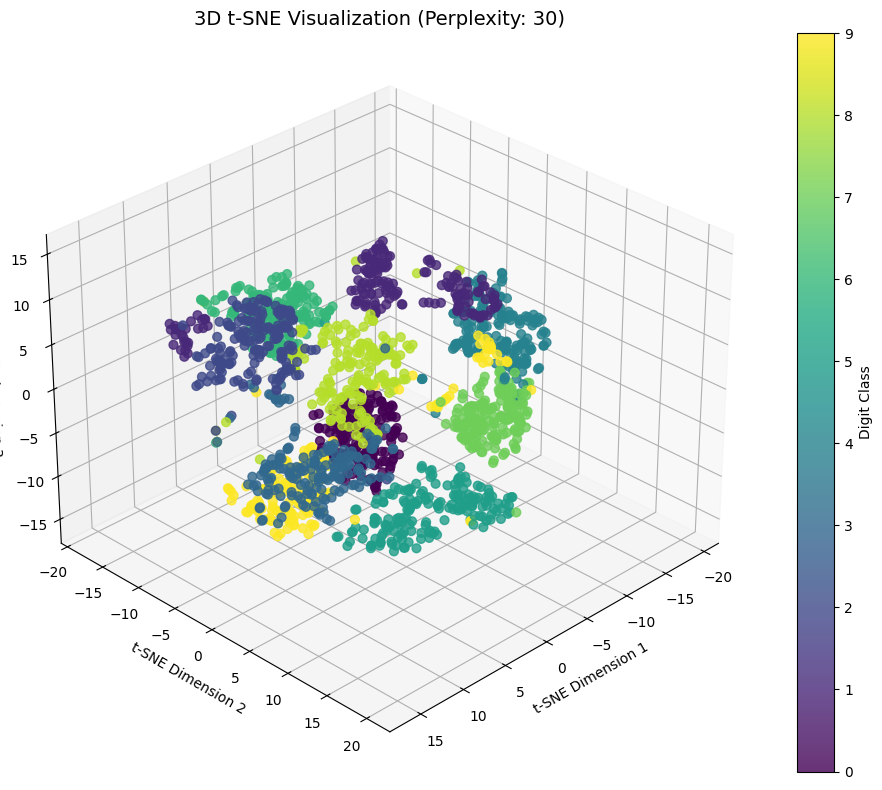

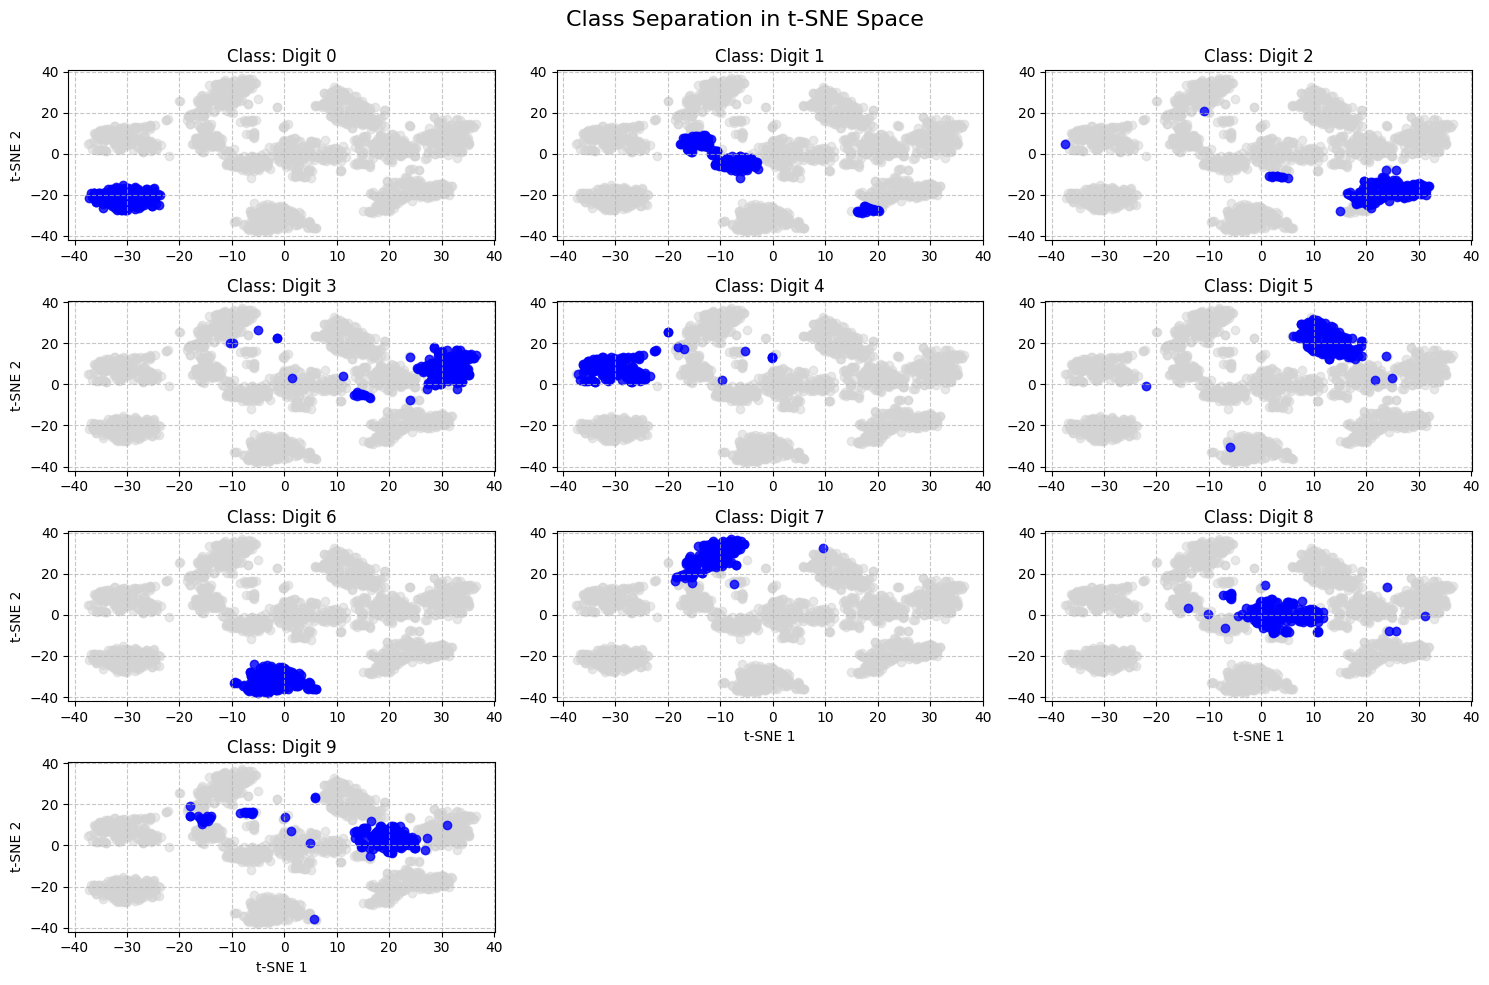

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import time

# Load a sample dataset (MNIST digits)
digits = load_digits()
X = digits.data
y = digits.target

print(f"Data shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Function to run t-SNE with different perplexity values
def run_and_plot_tsne(perplexities=[5, 30, 50], n_components=2, random_state=42):
    fig, axes = plt.subplots(1, len(perplexities), figsize=(5*len(perplexities), 5))

    for i, perplexity in enumerate(perplexities):
        # Start timer
        start_time = time.time()

        # Run t-SNE
        tsne = TSNE(n_components=n_components,
                    perplexity=perplexity,
                    n_iter=1000,
                    random_state=random_state,
                    learning_rate='auto')

        tsne_result = tsne.fit_transform(X_scaled)

        # Calculate elapsed time
        elapsed_time = time.time() - start_time

        # Plot the result
        scatter = axes[i].scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis', alpha=0.8)
        axes[i].set_title(f'Perplexity: {perplexity}\nTime: {elapsed_time:.2f}s')
        axes[i].set_xlabel('t-SNE 1')
        axes[i].set_ylabel('t-SNE 2')
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Add a colorbar for the classes
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(scatter, cax=cbar_ax)
    cbar.set_label('Digit Class')

    plt.suptitle('t-SNE Visualization of MNIST Digits with Different Perplexity Values', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

    return tsne_result

# Custom 3D t-SNE visualization
def run_and_plot_3d_tsne(perplexity=30, random_state=42):
    # Run t-SNE with 3 components
    tsne_3d = TSNE(n_components=3,
                   perplexity=perplexity,
                   n_iter=1000,
                   random_state=random_state,
                   learning_rate='auto')

    tsne_result_3d = tsne_3d.fit_transform(X_scaled)

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create scatter plot
    scatter = ax.scatter(
        tsne_result_3d[:, 0],
        tsne_result_3d[:, 1],
        tsne_result_3d[:, 2],
        c=y,
        cmap='viridis',
        marker='o',
        alpha=0.8,
        s=40
    )

    ax.set_title(f'3D t-SNE Visualization (Perplexity: {perplexity})', fontsize=14)
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_zlabel('t-SNE Dimension 3')

    # Add a color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Digit Class')

    # Improve the angle for better visualization
    ax.view_init(elev=30, azim=45)

    plt.tight_layout()
    plt.show()

    return tsne_result_3d

# Analyze the effect of different perplexity values
tsne_result = run_and_plot_tsne(perplexities=[5, 30, 50])

# Run 3D t-SNE
tsne_result_3d = run_and_plot_3d_tsne(perplexity=30)

# Analyze how classes separate in t-SNE space
def analyze_class_separation(tsne_result, y):
    plt.figure(figsize=(15, 10))

    # Create a grid of subplots
    classes = np.unique(y)
    n_rows = (len(classes) + 2) // 3  # Calculate rows needed (3 plots per row)

    for i, digit in enumerate(classes):
        plt.subplot(n_rows, 3, i+1)

        # Plot background points (all classes) in gray
        plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color='lightgray', alpha=0.5)

        # Highlight points of the current class
        mask = y == digit
        plt.scatter(tsne_result[mask, 0], tsne_result[mask, 1],
                   color='blue', alpha=0.8, label=f'Digit {digit}')

        plt.title(f'Class: Digit {digit}')
        plt.grid(True, linestyle='--', alpha=0.7)
        if i % 3 == 0:
            plt.ylabel('t-SNE 2')
        if i >= len(classes) - 3:
            plt.xlabel('t-SNE 1')

    plt.suptitle('Class Separation in t-SNE Space', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# Analyze class separation
analyze_class_separation(tsne_result, y)